In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('C:/Users/91766/Downloads/titanic/train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.shape

(891, 12)

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [9]:
data.drop(['PassengerId','Cabin'],axis=1,inplace = True)
data.shape

(891, 10)

In [15]:
print("Average Fare",round(data['Fare'].mean(),3))

Average Fare 32.204


In [17]:
print("Average Age",round(data['Age'].mean(),2))

Average Age 29.7


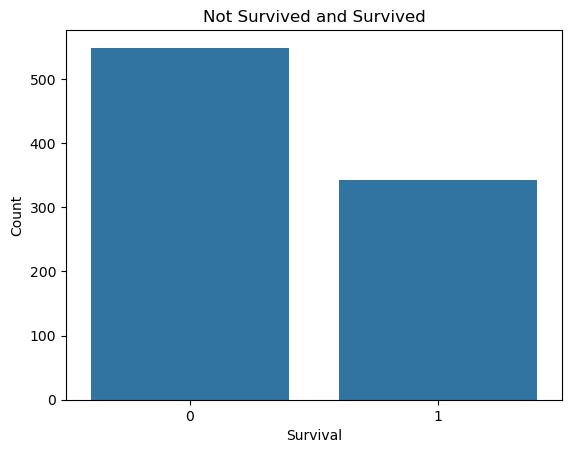

In [22]:
sns.countplot(x=data['Survived'])
plt.title("Not Survived and Survived")
plt.xlabel("Survival")
plt.ylabel("Count")
plt.show()

In [23]:
first_class_count=(data['Pclass'] == 1).sum()
print("First class",first_class_count)
second_class_count=(data['Pclass'] == 2).sum()
print("Second class",second_class_count)
third_class_count=(data['Pclass'] == 3).sum()
print("Third class",third_class_count)

                   

First class 216
Second class 184
Third class 491


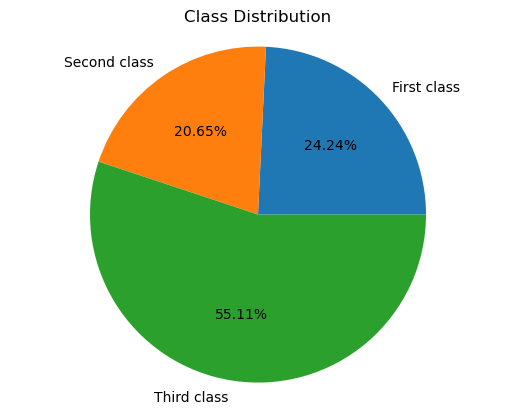

In [27]:
labels=["First class", "Second class", "Third class"]
sizes=[first_class_count,second_class_count,third_class_count]
plt.pie(sizes, labels=labels,autopct='%1.2f%%')
plt.axis("equal")
plt.title('Class Distribution')
plt.show()

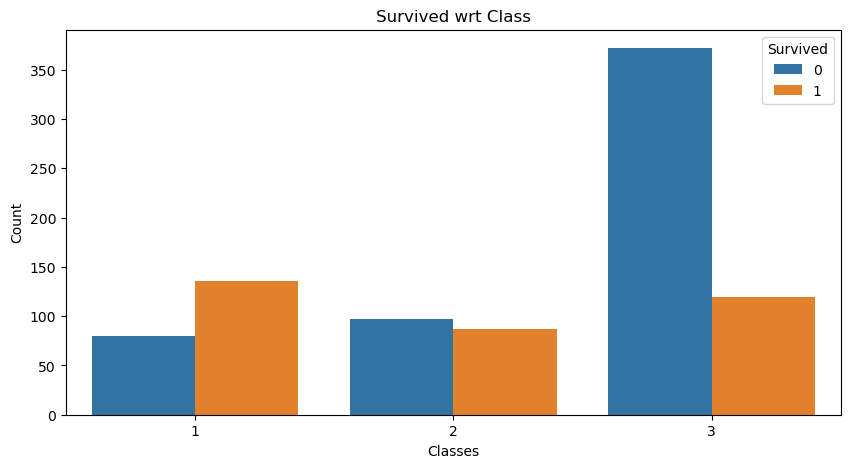

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x=data["Pclass"], hue=data['Survived'])
plt.title("Survived wrt Class")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

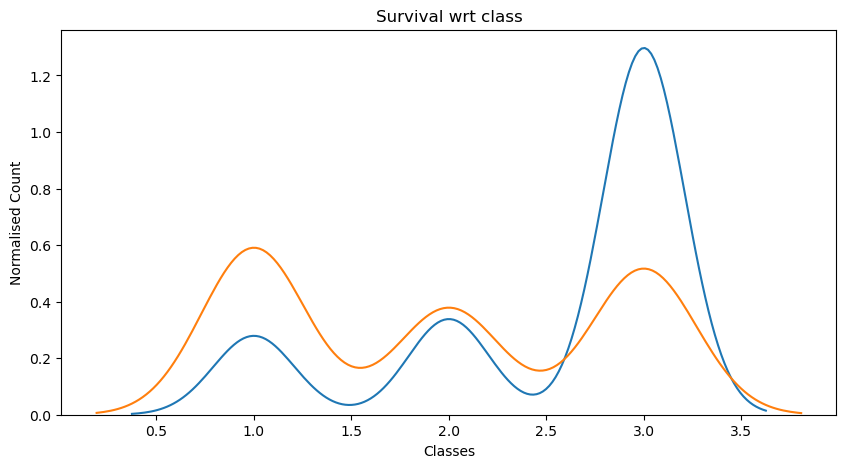

In [36]:
plt.figure(figsize=(10,5))
axs=sns.kdeplot(data.Pclass[data.Survived==0],label="Died")
axs=sns.kdeplot(data.Pclass[data.Survived==1],label="Survived")
plt.title("Survival wrt class")
plt.xlabel("Classes")
plt.ylabel("Normalised Count")
plt.show()

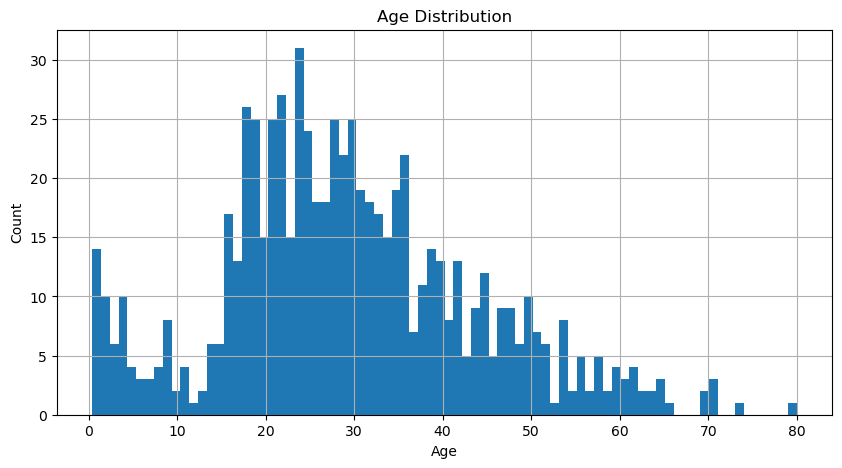

In [38]:
data.hist(column='Age',bins=80 ,figsize=(10,5))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

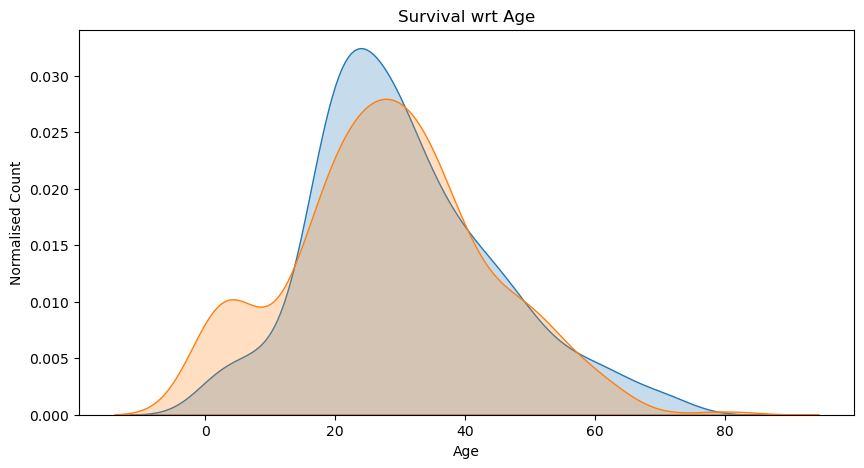

In [45]:
plt.figure(figsize=(10,5))
axs=sns.kdeplot(data.Age[data.Survived==0],fill = True ,label="Died")
axs=sns.kdeplot(data.Age[data.Survived==1], fill = True ,label="Survived")
plt.title("Survival wrt Age")
plt.xlabel("Age")
plt.ylabel("Normalised Count")
plt.show()

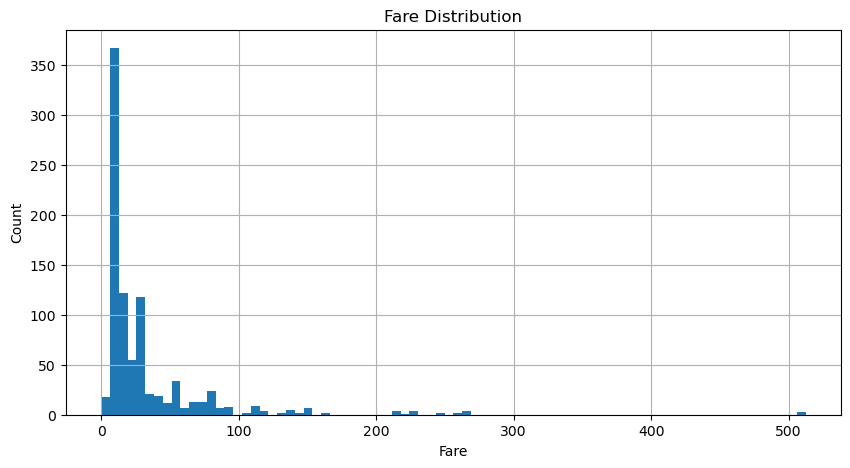

In [60]:
data.hist(column='Fare',bins=80 ,figsize=(10,5))
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

In [67]:
survived_above_500=((data["Fare"]>500) & (data["Survived"]==1)).sum()
print("Survived after paying more than 500 dollars :",survived_above_500)

Survived after paying more than 500 dollars : 3


In [68]:
data.loc[data['Fare']>500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


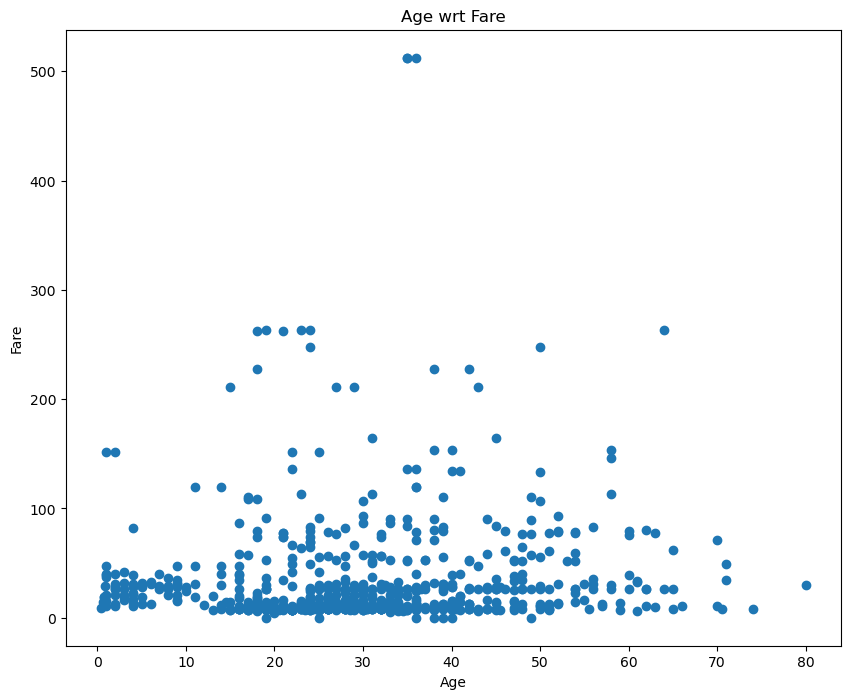

In [69]:
plt.figure(figsize=(10,8))
plt.scatter(data['Age'],data['Fare'])
plt.title("Age wrt Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

In [71]:
male_dead = ((data["Sex"]== 'male')& (data["Survived"]==0)).sum()
print("Men died",male_dead)
male_survived= ((data["Sex"]== 'male')& (data["Survived"]==1)).sum()
print("Men Survived",male_dead)
female_dead= ((data["Sex"]== 'female')& (data["Survived"]==0)).sum()
print("Women died",female_dead)
female_survived= ((data["Sex"]== 'female')& (data["Survived"]==1)).sum()
print("Women Survived",female_survived)

Men died 468
Men Survived 468
Women died 81
Women Survived 233


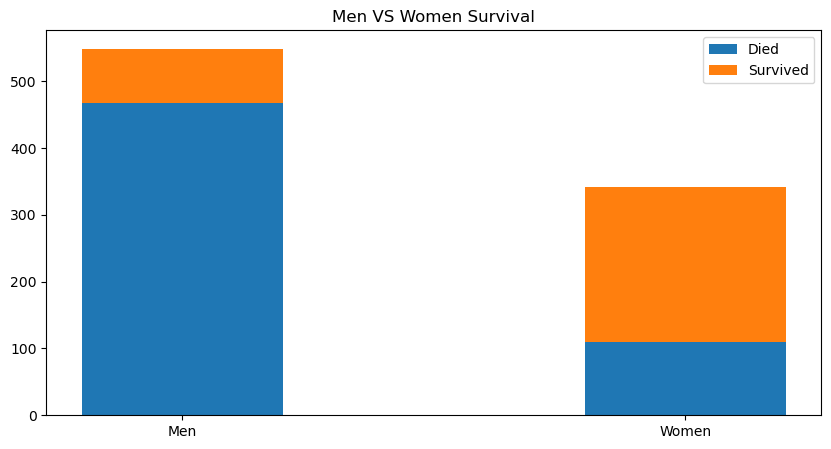

In [75]:
plt.figure(figsize=(10,5))
m_data=(male_dead,male_survived)
f_data=(female_dead,female_survived)
p1=plt.bar(np.arange(2),(m_data),width=0.4)
p2=plt.bar(np.arange(2),(f_data),bottom=m_data,width=0.4)
plt.xticks(np.arange(2),["Men","Women"])
plt.legend((p1[0],p2[0]),("Died","Survived"))
plt.title("Men VS Women Survival")
plt.show()

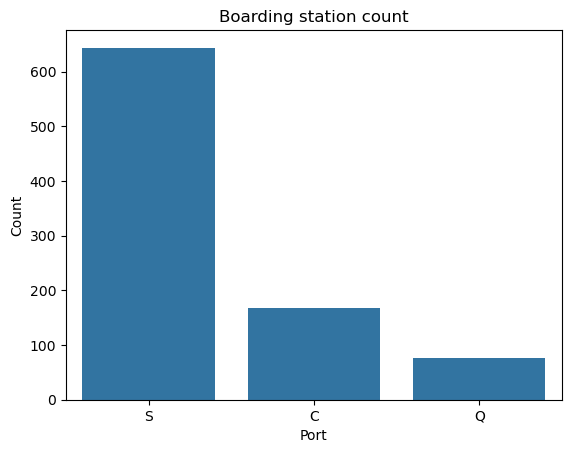

In [78]:
sns.countplot(x=data['Embarked'])
plt.title("Boarding station count")
plt.xlabel("Port")
plt.ylabel("Count")
plt.show()

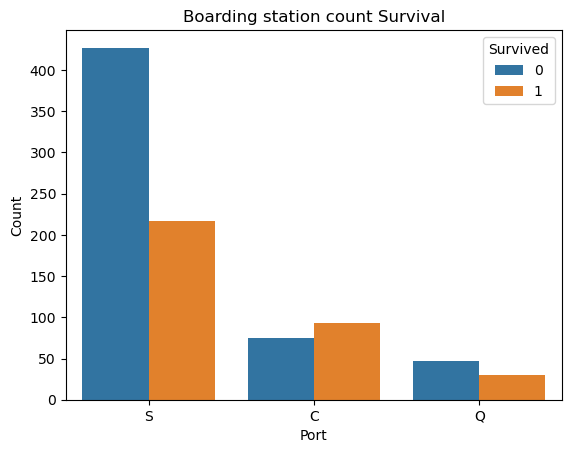

In [79]:
sns.countplot(x=data['Embarked'],hue= data["Survived"])
plt.title("Boarding station count Survival")
plt.xlabel("Port")
plt.ylabel("Count")
plt.show()

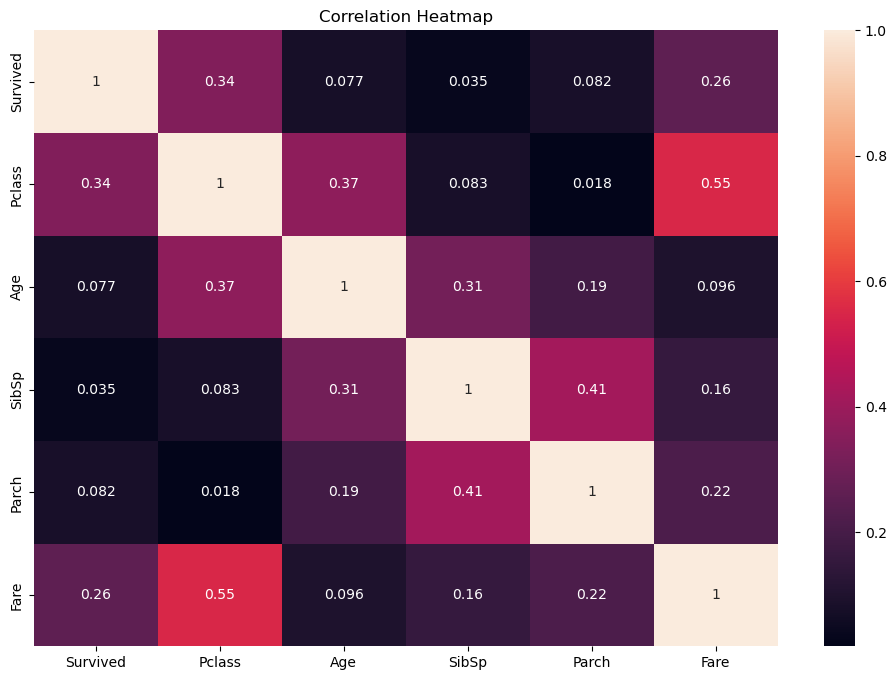

In [85]:
plt.figure(figsize=(12,8))
numeric_data = data.select_dtypes(include='number')  
ax = sns.heatmap(numeric_data.corr().abs(), annot=True)
plt.title("Correlation Heatmap")
plt.show()
